<a href="https://colab.research.google.com/github/gauravguptagtm/deep-learning-notebook/blob/main/DL_13(Improve_a_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to improve a NN

1. By improving NN hyperparameters.
2. By solving problems
  - Vanishing/Exploding Gradient
  - Not enough Data.
  - Slow training
  - Overfitting


## 1. How to finetune hyperparameter

- No. of hidden layers - have more hidden layer with less neuron
- No. of neuron per hidden layers
- learning rate
- optimizer
- batch size
  - warming up (learning rate increases as epoch increases)
  - keep low learning rate
- activtion function
- epoch value

# Early Stopping

- Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent.
- Early stopping is a method in Deep Learning that allows you to specify an arbitrarily large number of training epochs and stop training once the model performance stops improving on the validation dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

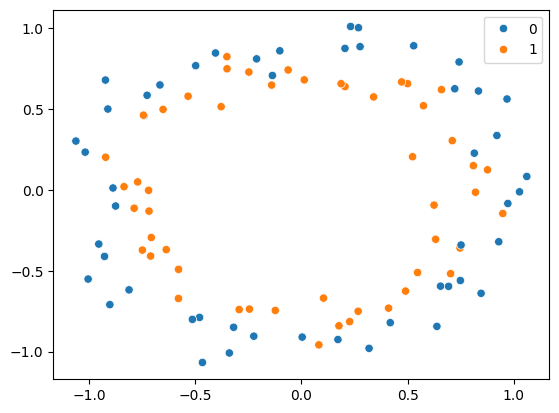

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

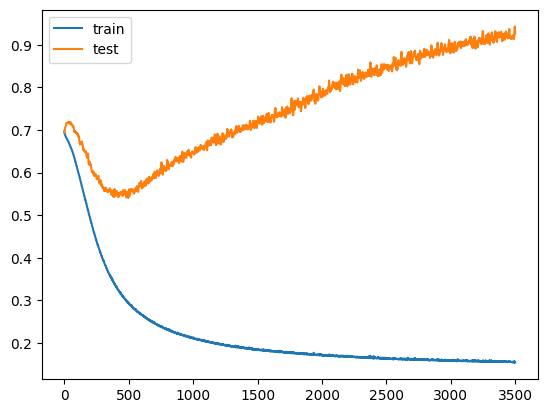

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


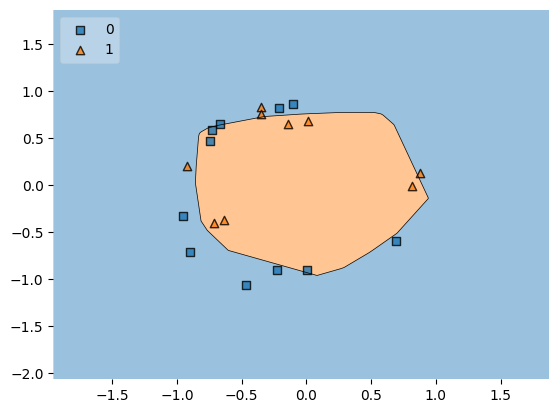

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 93ms/step - loss: 0.6940 - accuracy: 0.5250 - val_loss: 0.6971 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6997 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6897 - accuracy: 0.5500 - val_loss: 0.7034 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.6881 - accuracy: 0.5625 - val_loss: 0.7065 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6874 - accuracy: 0.5500 - val_loss: 0.7076 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6866 - accuracy: 0.5500 - val_loss: 0.7091 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6857 - accuracy: 0.5500 - val_loss: 0.7107 - val_accuracy: 0.4000
Epoch 8/3500


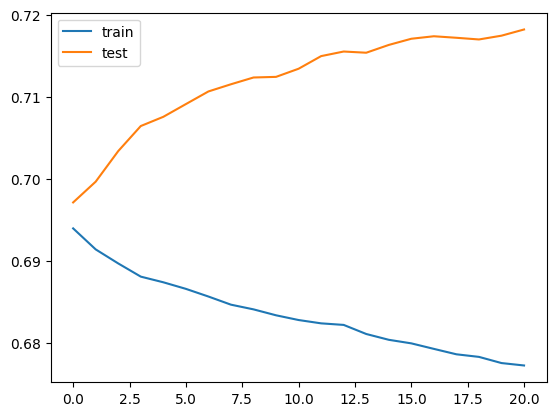

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 24s 2ms/step


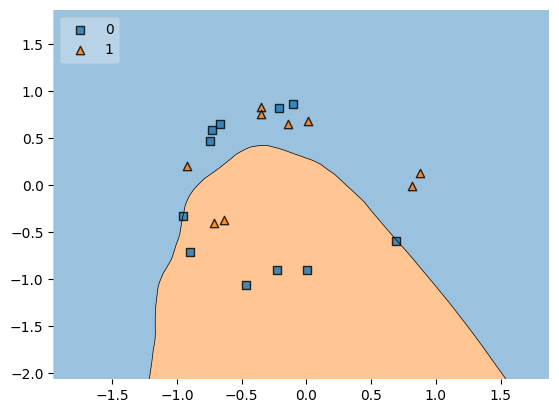

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()